# Пуассоновская регрессия
### Kirill Zakharov
2021

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## 1. Чтение и подготовка данных

Рассмотрим данные о количестве велосипедистов. Количество велосипедистов зависит от погодных условий в рассматриваемый день: чем хуже погода, тем меньше желающих. В качестве признаков возьмем:
- максимальную температуру в рассматриваемый день (F);
- минимальную температуру в рассматриваемый день (F);
- количество осадков.

In [2]:
data = pd.read_csv('data/nyc_bicyclist_counts.csv', index_col=['Date'], parse_dates=True)

In [3]:
data.head()

,HIGH_T,LOW_T,PRECIP,BB_COUNT
Date,,,,
2017-04-01,46.0,37.0,0.00,606
2017-04-02,62.1,41.0,0.00,2021
2017-04-03,63.0,50.0,0.03,2470
2017-04-04,51.1,46.0,1.18,723
2017-04-05,63.0,46.0,0.00,2807


Целевая переменная &ndash; `'BB_COUNT'` &ndash; содержит только целые положительные числа, что должно быть учтено при выборе предсказательной модели.

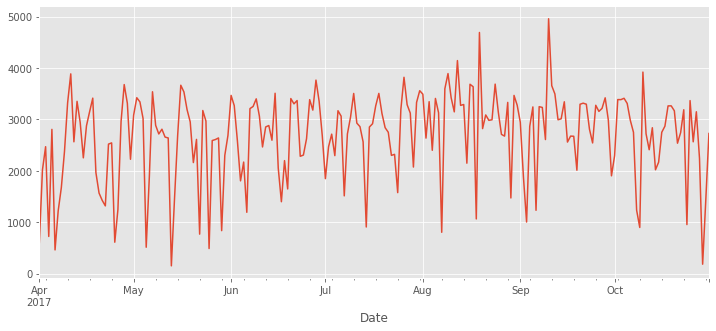

In [4]:
data['BB_COUNT'].plot(figsize=(12,5))
plt.show()

Кроме указанных факторов, количество велосипедистов может зависеть от дня недели: в выходные количество желающих больше, нежели в будни. Также может оказаться важным месяц. Добавим столбцы, содержащие информацию о том, на какой день недели и на какой месяц приходится наблюдение:

In [5]:
data['DAY_OF_WEEK'] = data.index.dayofweek
data['MONTH'] = data.index.month

In [6]:
data

,HIGH_T,LOW_T,PRECIP,BB_COUNT,DAY_OF_WEEK,MONTH
Date,,,,,,
2017-04-01,46.0,37.0,0.00,606,5,4
2017-04-02,62.1,41.0,0.00,2021,6,4
2017-04-03,63.0,50.0,0.03,2470,0,4
2017-04-04,51.1,46.0,1.18,723,1,4
2017-04-05,63.0,46.0,0.00,2807,2,4
...,...,...,...,...,...,...
2017-10-27,62.1,48.0,0.00,3150,4,10
2017-10-28,68.0,55.9,0.00,2245,5,10
2017-10-29,64.9,61.0,3.03,183,6,10


Данные переменные являются категориальными.

<div class="alert alert-info">

<h3> Задание 1</h3>
<p></p>
<ul>1. Определите функцию, которая принимает на вход исходные данные $(X,y)$ и параметры модели $\theta$. Данная функция должна возвращать среднеквадратичную ошибку модели.</ul>
    
<ul>2. Определите аналогичную функцию, которая возвращает значение функционала качества пуассоновской регрессии.</ul>  
    
<ul>3. Обучите обе модели с помощью функции minimize из SciPy. Сравните качество аппроксимации моделей. Метрикой качества выберите среднюю абсолютную ошибку.</ul>    
 
<ul>4. Отобразите на графике исходный ряд и результаты аппроксимации линейной и пуассоновской регрессиями.</ul>
<p></p>   

<p></p>
</div>

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.compose import TransformedTargetRegressor
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [8]:
def mse(X,y,theta):
    return ((y-np.dot(X,theta))**2).mean()

In [9]:
X=data.drop('BB_COUNT', axis=1)
y = data['BB_COUNT']

In [10]:
X['const'] = 1

In [11]:
theta0 = np.ones(X.shape[1])

In [12]:
lin_reg = minimize(lambda theta: mse(X,y,theta), tuple(theta0))
lin_reg_params = lin_reg.x

In [13]:
y_pred_lin = np.dot(X, lin_reg_params)

In [14]:
mean_absolute_error(y,y_pred_lin)

436.47891354579264

In [15]:
def pois(X,y,theta):
    mu = np.dot(X,theta)
    return (np.exp(mu)-y*mu).mean()

In [16]:
theta0 = np.zeros(X.shape[1])

In [17]:
pois_reg = minimize(lambda theta1: pois(X,y,theta1), tuple(theta0))
pois_reg_params = pois_reg.x

In [21]:
y_pred_pois = np.dot(X, pois_reg_params)
data['pois_approx'] = y_pred_pois

In [22]:
mean_absolute_error(y,data['pois_approx'])

2672.198724958147

In [23]:
data['lin_approx'] = y_pred_lin
data['pois_approx'] = np.exp(y_pred_pois)

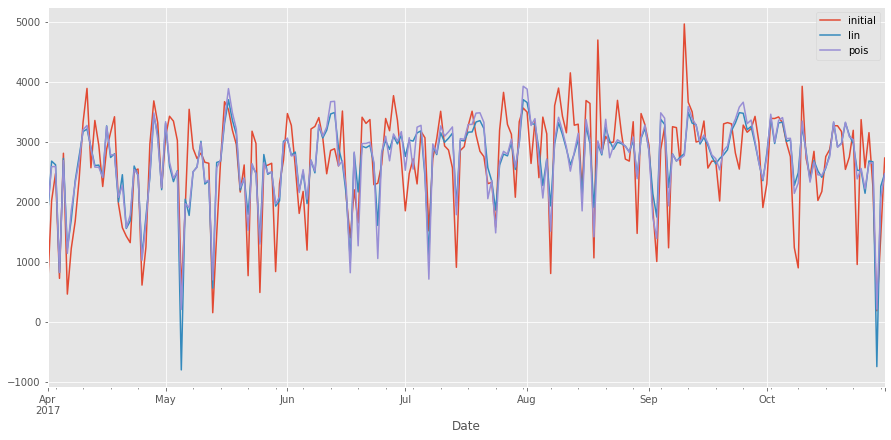

In [24]:
a = data['BB_COUNT'].plot(figsize=(15,7), label = 'initial')
b = data['lin_approx'].plot(label = 'lin')
c = data['pois_approx'].plot(label = 'pois')
a.legend()
b.legend()
c.legend()
plt.show()

<div class="alert alert-info">

<h3> Задание 2</h3>
<p></p>
<ul>Линейные модели чувствительны к виду категориальных признаков. Преобразуйте категориальные признаки с помощью One Hot Encoding и повторите шаги 3-4 из задания 1. Как изменилось качество моделей?</ul>
<p></p>
</div>

In [25]:
data = pd.read_csv('data/nyc_bicyclist_counts.csv', index_col=['Date'], parse_dates=True)

In [26]:
data['DAY_OF_WEEK'] = data.index.dayofweek
data['MONTH'] = data.index.month

In [27]:
X=data.drop(['BB_COUNT','DAY_OF_WEEK','MONTH'], axis = 1)
y = data['BB_COUNT']

In [28]:
from sklearn.preprocessing import OneHotEncoder

In [29]:
enc = OneHotEncoder(handle_unknown='ignore')

In [30]:
enc.fit(data[['DAY_OF_WEEK','MONTH']])

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=True)

In [31]:
X[['SUN','MON','TUES','WEN','THUR','FRI','SAT','APR','JUN','JUL','AUG','SEP','OCT','NOV']] = enc.transform(data[['DAY_OF_WEEK','MONTH']]).toarray()

In [32]:
X['const'] = 1

In [33]:
theta0 = np.ones(X.shape[1])

In [34]:
lin_reg = minimize(lambda theta: mse(X,y,theta), tuple(theta0))
lin_reg_params = lin_reg.x

In [35]:
y_pred_lin = np.dot(X, lin_reg_params)

In [36]:
mean_absolute_error(y,y_pred_lin)

407.0364382052582

In [37]:
theta0 = np.zeros(X.shape[1])

In [38]:
pois_reg = minimize(lambda theta1: pois(X,y,theta1), tuple(theta0))
pois_reg_params = pois_reg.x

In [42]:
y_pred_pois = np.dot(X, pois_reg_params)
data['pois_approx'] = y_pred_pois

In [43]:
mean_absolute_error(y,data['pois_approx'])

2672.200175886813

In [44]:
data['lin_approx'] = y_pred_lin
data['pois_approx'] = np.exp(y_pred_pois)

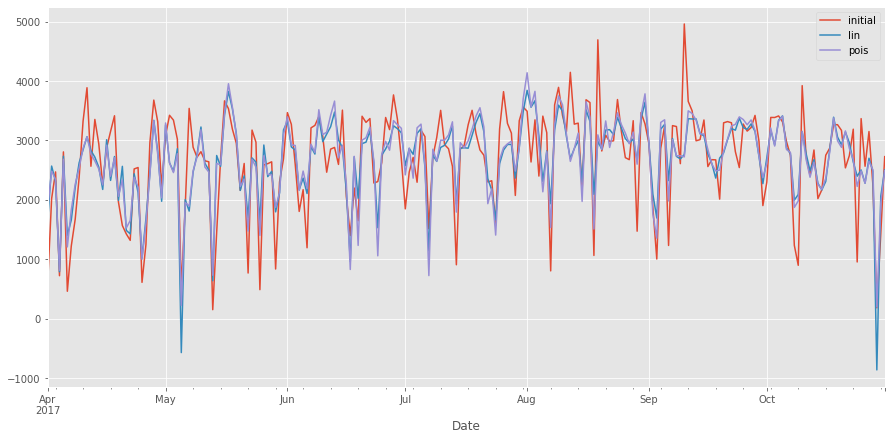

In [45]:
a = data['BB_COUNT'].plot(figsize=(15,7), label = 'initial')
b = data['lin_approx'].plot(label = 'lin')
c = data['pois_approx'].plot(label = 'pois')
a.legend()
b.legend()
c.legend()
plt.show()

<div class="alert alert-info">

<h3> Задание 3</h3>
<p></p>
<ul>Преобразуйте категориальные признаки с помощью Фурье-разложения и повторите шаги 3-4 из задания 1. Какого качества моделей удалось достичь?</ul>
<p></p>
</div>

In [46]:
data = pd.read_csv('data/nyc_bicyclist_counts.csv', index_col=['Date'], parse_dates=True)

In [47]:
data['DAY_OF_WEEK'] = data.index.dayofweek
data['MONTH'] = data.index.month

In [48]:
X=data.drop(['BB_COUNT','DAY_OF_WEEK','MONTH'], axis = 1)
y = data['BB_COUNT']

In [49]:
X[['SIN_M','COS_M','SIN_W','COS_W']] = np.array([np.sin(2*np.pi/7*data['MONTH']),np.cos(2*np.pi/7*data['MONTH']),np.sin(2*np.pi/12*data['DAY_OF_WEEK']),np.cos(2*np.pi/12*data['DAY_OF_WEEK'])]).transpose()

In [50]:
X['const'] = 1

In [51]:
theta0 = np.zeros(X.shape[1])

In [52]:
lin_reg = minimize(lambda theta: mse(X,y,theta), tuple(theta0))
lin_reg_params = lin_reg.x

In [53]:
lin_reg_params

array([  70.29532892,  -53.79022215, -936.92025059,  112.65600643,
        115.19476309,  291.72440327,  156.21704308,  770.13920169])

In [54]:
y_pred_lin = np.dot(X, lin_reg_params)

In [55]:
mean_absolute_error(y,y_pred_lin)

422.08911072180587

In [56]:
pois_reg = minimize(lambda theta1: pois(X,y,theta1), tuple(theta0))
pois_reg_params = pois_reg.x

In [59]:
y_pred_pois = np.dot(X, pois_reg_params)

In [60]:
data['lin_approx'] = y_pred_lin
data['pois_approx'] = np.exp(y_pred_pois)

In [61]:
mean_absolute_error(y,data['pois_approx'])

402.25765838075705

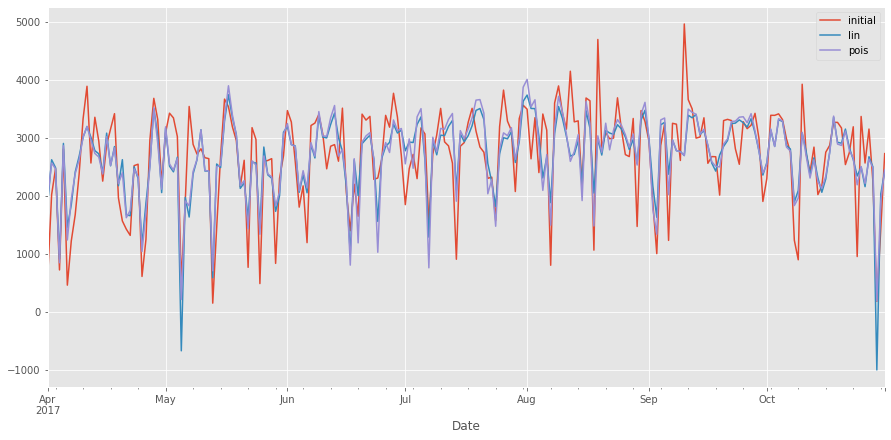

In [62]:
a = data['BB_COUNT'].plot(figsize=(15,7), label = 'initial')
b = data['lin_approx'].plot(label = 'lin')
c = data['pois_approx'].plot(label = 'pois')
a.legend()
b.legend()
c.legend()
plt.show()